# MAKE SURE YOU PULL THE DATA FILES FROM TEAMS BEFORE YOU START PLAYING AROUND IN HERE.

We are using oracle-cards-20250127220801.json

Our repo has the data folder in the .gitignore so we don't clutter up the GitHub repo.

In [22]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn
import numpy as np

# import nltk



# Read Data

In [23]:
data = pd.read_json('../data/external/oracle-cards-20250127220801.json')

In [24]:
data.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'cardmarket_id', 'name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'legalities', 'games', 'reserved', 'foil', 'nonfoil',
       'finishes', 'oversized', 'promo', 'reprint', 'variation', 'set_id',
       'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'watermark', 'flavor_text',
       'card_back_id', 'artist', 'artist_ids', 'illustration_id',
       'border_color', 'frame', 'frame_effects', 'security_stamp', 'full_art',
       'textless', 'booster', 'story_spotlight', 'preview', 'prices',
       'related_uris', 'purchase_uris', 'mtgo_id', 'mtgo_foil_id',
       'tcgplayer_id', 'edhrec_rank', 'penny_rank', 'arena_id',

## Down select columns from data

In [45]:
data.set.unique()

array(['drc', '7ed', 'm14', 'c19', '9ed', 'ymkm', 'ulg', 'war', 'woe',
       'scg', 'me1', 'otc', 'ody', 'arb', 'jmp', 'xln', 'vma', 'da1',
       'c13', 'm20', 'hou', 'me3', 'znc', '10e', '5ed', 'und', 'moc',
       'afdn', 'zen', 'shm', 'mm2', 't40k', 'aone', 'me4', 'tinr', 'apc',
       'snc', 'ust', 'gs1', 'mkm', 'afc', 'aneo', 'lcc', 'por', 'rix',
       'inv', 'iko', 'twoc', 'frf', 'nec', 'm12', 'dom', 'clb', 'ltr',
       'cn2', 'astx', 'one', 's99', 'emn', 'khm', 'lgn', 'akh', 'dmc',
       'lrw', 'aer', 'neo', 'cns', 'mh3', 'td2', 'eld', 'acr', 'a25',
       'rav', 'mh2', 'p02', 'ths', 'tcmm', 'm19', 'avr', 'j22', 'dsk',
       'mb2', 'afr', 'ktk', 'mkc', 'fdn', 'blb', 'rvr', 'fj25', 'bro',
       'isd', 'dst', 'clu', 'mbs', 'c16', 'm15', 'aafr', 'otj', 'wwk',
       'tmp', 'mh1', 'bfz', 'j21', 'm3c', 'pca', 'nem', 'cmm', 'abro',
       'asnc', 'ala', 'mir', 'e01', 'stx', '40k', 'jou', 'jud', 'thb',
       'avow', 'mrd', 'fem', 'unf', 'm13', 'pls', 'totc', 'dmu', 'lci',
     

In [34]:
# Create new dataframe with selected columns and filter out reprints
selected_df = data[['name', 'mana_cost', 'type_line', 'oracle_text', 'power', 'toughness', 'colors', 'keywords', 'mtgo_id', 'loyalty', 'defense']]

In [35]:
selected_df

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33826,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33827,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33828,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33829,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [ ]:
# What are all of the unique keywords in the dataset?
unique_keywords = list(set([keyword for keywords in data['keywords']for keyword in keywords]))
unique_keywords

['Collect evidence',
 'Conspire',
 'Nitro-9',
 'Midnight Entity',
 'Grand Strategist',
 'Healing Tears',
 'Rapid Regeneration',
 'Praise Him',
 'Mark of Chaos Ascendant',
 'Encore',
 'Battle Cry',
 'Look to the Stars',
 'Body Thief',
 'Delirium',
 'Fuse',
 'Fire of Tzeentch',
 'Weird Insight',
 'Psychic Stimulus',
 'Transform',
 'Stimpak',
 'Toxic Spores',
 'Mold Harvest',
 'Strike first',
 'For Auld Lang Syne',
 'Manifest dread',
 'Dethrone',
 'Legendary landwalk',
 'Landcycling',
 'Heroic',
 'Water Always Wins',
 'Stew',
 'Rulebreaker',
 'Skulk',
 "Everypony's Invited",
 'Unearthly Power',
 'Mold Earth',
 'Epic',
 'Arcane Life-support',
 'Titanic',
 'Blind Betrayal',
 'Persist',
 "Hero's Reward",
 'Kinship',
 'Imprint',
 'Undaunted',
 'Phaeron',
 'Discover',
 'Chainsword',
 'Miracle',
 'Conjure',
 'Hellbent',
 'Islandcycling',
 'Devastating Charge',
 'Myriad',
 'Connive',
 'The Last Centurion',
 'Sage Project',
 'Guardian Protocols',
 'Parley',
 'Ninjutsu',
 'How Civil of You',
 'Tem

In [38]:
# What are the cards that are associated with each keyword?

# Create dictionary to store keyword locations
keyword_locations = {}

# Iterate through dataframe and collect locations
for idx, row in data.iterrows():
    for keyword in row['keywords']:
        if keyword in keyword_locations:
            keyword_locations[keyword].append(idx)
        else:
            keyword_locations[keyword] = [idx]

# Sort by keyword
sorted_keywords = dict(sorted(keyword_locations.items()))

# Print results
for keyword, indices in sorted_keywords.items():
    print(f"{keyword}: appears in rows {indices}")

# Optional: Get just unique keywords list
unique_keywords = list(sorted_keywords.keys())

... Catch: appears in rows [16466]
A Thousand Souls Die Every Day: appears in rows [21914]
Aberrant Tinkering: appears in rows [28236]
Adamant: appears in rows [1379, 2841, 3268, 3406, 4076, 5107, 6299, 6722, 6772, 13632, 14689, 20985, 26580, 27395, 28086, 28131, 31568, 32550]
Adapt: appears in rows [11, 564, 1050, 1877, 3523, 6826, 7448, 8183, 9657, 10515, 11241, 12002, 15376, 17364, 20505, 21167, 22072, 24276, 24308, 25843, 26795, 29520, 30835, 33218, 33426]
Addendum: appears in rows [276, 5181, 14122, 18264, 19099, 19905, 22631, 22890, 23537, 27008]
Advanced Species: appears in rows [11225]
Aegis of the Emperor: appears in rows [30007]
Affinity: appears in rows [17, 82, 952, 1028, 1115, 2667, 2884, 2895, 3574, 3860, 4819, 5641, 5915, 6078, 6694, 7953, 8332, 8747, 10962, 12012, 12104, 13171, 14872, 15138, 16002, 16752, 17089, 17842, 17857, 17915, 20591, 20787, 20788, 21494, 21497, 22246, 22932, 23153, 25253, 26304, 26988, 27001, 27234, 27277, 27942, 30006, 30302, 31125, 32117]
Affirm

In [42]:
# Take a look at a specific card (The Golden Throne: id 21914) which has a singleton keyword of `A Thousand Souls Die Every Day`
selected_df.loc[12789]

name                                             Canoptek Wraith
mana_cost                                                    {3}
type_line                             Artifact Creature — Wraith
oracle_text    Wraith Form — Canoptek Wraith can't be blocked...
power                                                          2
toughness                                                      1
colors                                                        []
keywords                   [Transdimensional Scout, Wraith Form]
mtgo_id                                                 108778.0
loyalty                                                      NaN
defense                                                      NaN
Name: 12789, dtype: object

In [ ]:
# Sort the cards by the number of times a keyword appears in the dataset

# Create dictionaries for frequencies and locations
keyword_freq = {}
keyword_locations = {}

# Count frequencies and store locations
for idx, row in data.iterrows():
    for keyword in row['keywords']:
        # Update frequency count
        keyword_freq[keyword] = keyword_freq.get(keyword, 0) + 1
        # Store location
        if keyword in keyword_locations:
            keyword_locations[keyword].append(idx)
        else:
            keyword_locations[keyword] = [idx]

# Sort by frequency (highest to lowest)
sorted_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=False))

# Print results with both frequency and locations
for keyword, freq in sorted_keywords.items():
    print(f"{keyword}: appears {freq} times in rows {keyword_locations[keyword]}")

# Store sorted unique keywords if needed
unique_keywords = list(sorted_keywords.keys())


Shrieking Gargoyles: appears 1 times in rows [169]
Phalanx Commander: appears 1 times in rows [223]
Feed: appears 1 times in rows [432]
Friends: appears 1 times in rows [432]
Medicus Ministorum: appears 1 times in rows [937]
Sonic Booster: appears 1 times in rows [1031]
Double agenda: appears 1 times in rows [1053]
Disarm: appears 1 times in rows [1290]
Detonate: appears 1 times in rows [1290]
Avoidance: appears 1 times in rows [1325]
Mama's Coming: appears 1 times in rows [1694]
Alluring Eyes: appears 1 times in rows [1781]
History Teacher: appears 1 times in rows [1924]
Keen Sight: appears 1 times in rows [2074]
Scavenge the Dead: appears 1 times in rows [2076]
The Most Important Punch in History: appears 1 times in rows [2103]
Wild Shape: appears 1 times in rows [2278]
Secrets of the Soul: appears 1 times in rows [2281]
Leap Strike: appears 1 times in rows [2482]
Rope Dart: appears 1 times in rows [2482]
Synapse Creature: appears 1 times in rows [2513]
Rites of Banishment: appears 1

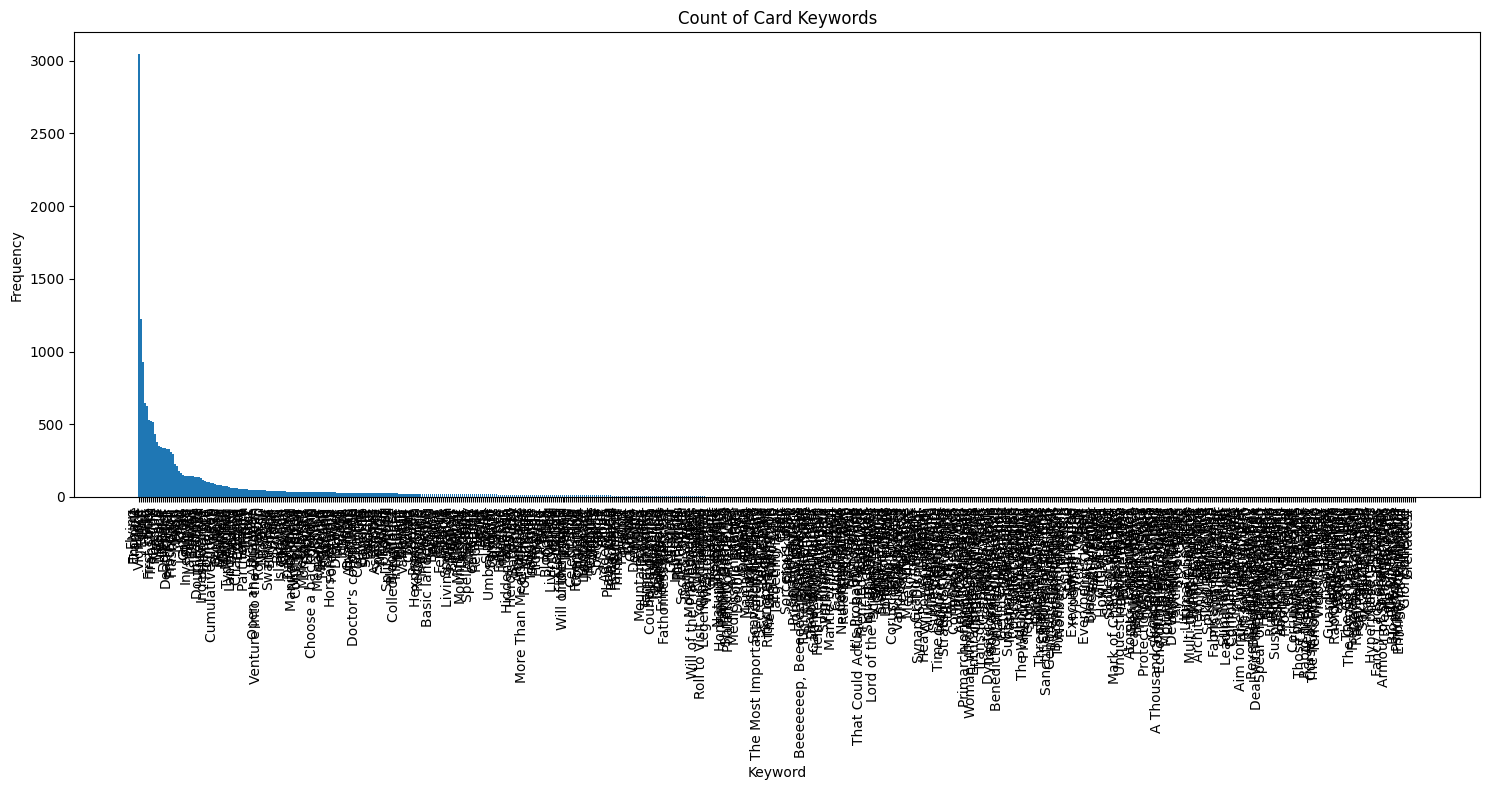

In [58]:
# Plot the keyword frequency

# Sort keywords by frequency in descending order and get top 20
hist_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)[:])

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(hist_keywords.keys(), hist_keywords.values())
plt.xticks(rotation=90, ha='right')
plt.title('Count of Card Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()

There are a ton of cards that are singleton keywords!  I'm not certain we want those in the dataset.  They're just so random given that they are from the MTG Beyond universe where they take 3rd party IPs and make MTG cards out of them.  Universes are from: Warhammer 40k, Dr. Who, Assasins Creed, The Walking Dead, Stranger Things, Fortnite, Street Fighter, Transformers, LoTR... the list goes on...

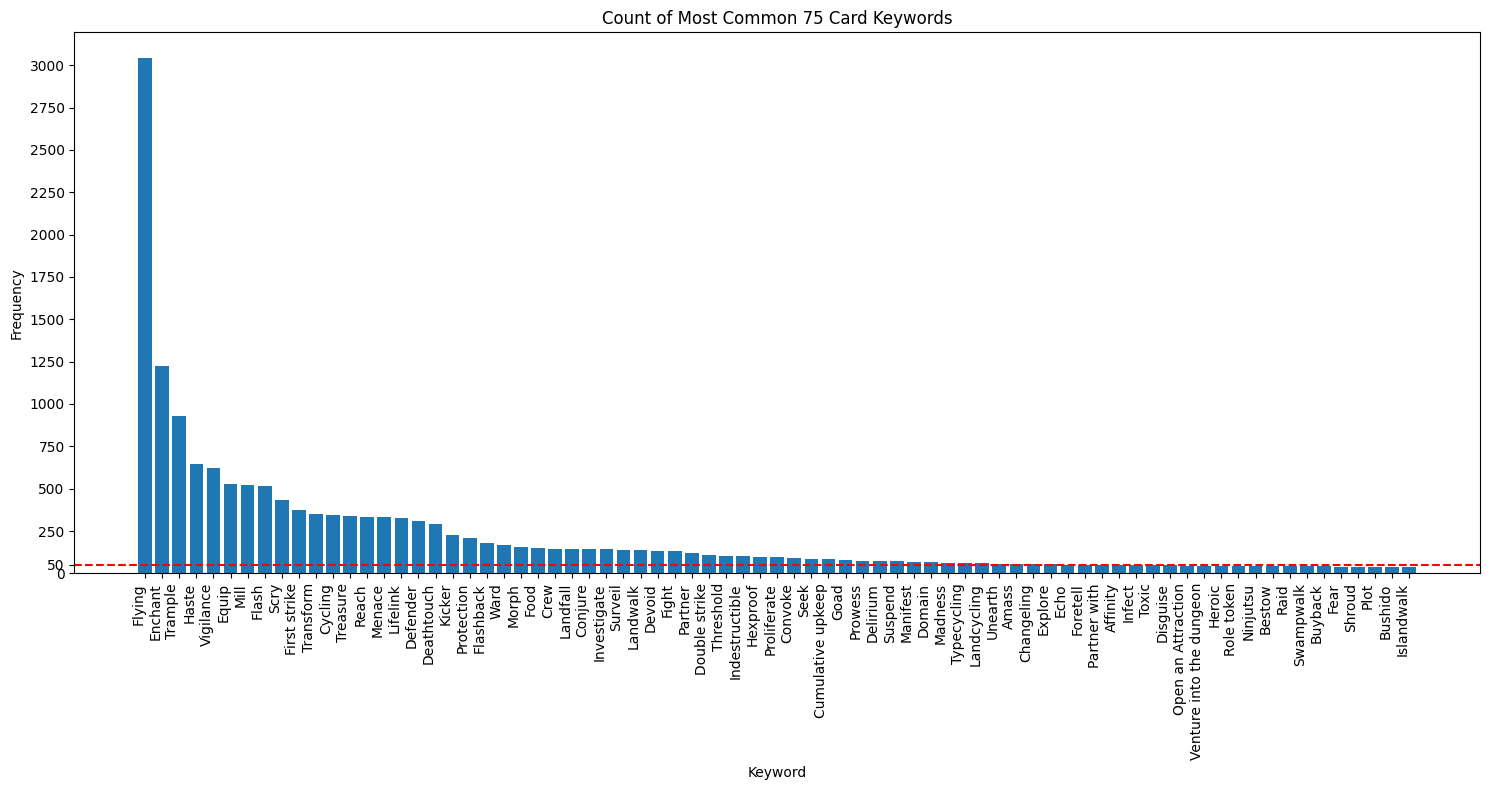

In [80]:
# What do the most common 75 keywords look like?

# Sort keywords by frequency in descending order and get top 75 (for better visualization)
top20_hist_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)[:75])

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(top20_hist_keywords.keys(), top20_hist_keywords.values())
plt.xticks(rotation=90, ha='right')
plt.title('Count of Most Common 75 Card Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.yticks([0, 50] + list(range(250, int(plt.ylim()[1]), 250)))
plt.axhline(y=50, color='r', linestyle='--')
plt.tight_layout()

In [46]:
# Reduce the dataset by removing cards that contain keywords that appear only once throughout all of MTG.

# Get list of keywords that appear only once
single_occurrence_keywords = [k for k,v in keyword_freq.items() if v == 1]

# Create mask for rows that don't contain any of the single occurrence keywords
mask = ~selected_df['keywords'].apply(lambda x: any(kw in x for kw in single_occurrence_keywords))

# Filter dataframe using mask
selected_df_reducedKW = selected_df[mask]

In [47]:
selected_df_reducedKW

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33826,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33827,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33828,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33829,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [48]:
# Check to see if the length has reduced
len(selected_df_reducedKW)

33557

In [82]:
# Look at the Throne of the Emperor: id 21914 again to see if it has been removed.
# selected_df_reducedKW.loc[21914] # This card has been removed
selected_df_reducedKW.loc[21915] # This card remains, though it is a double-faced card with Etali, Primal Conqueror being the front face.
                                #This is different than a card with a sorcery/instant on the same front face.

name           Etali, Primal Sickness // Etali, Primal Sickness
mana_cost                                                   NaN
type_line                                          Card // Card
oracle_text                                                 NaN
power                                                       NaN
toughness                                                   NaN
colors                                                      NaN
keywords                                                     []
mtgo_id                                                     NaN
loyalty                                                     NaN
defense                                                     NaN
Name: 21915, dtype: object

In [91]:
# Reindex the dataframe
reindex_selected_df = selected_df_reducedKW.reset_index(drop=True)
reindex_selected_df

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33552,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33553,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33554,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33555,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


Cards that are transform (having a front and back) seem to be having issues within the database.  See Etali [original id 21915] and Toralf, God of Fury (reindex id 33554).

I'm going to check how many of the `* // *` cards exist and possibly just remove them from the dataset.

In [ ]:
# Find cards with '//' in their names
double_faced_cards = reindex_selected_df[reindex_selected_df['name'].str.contains('//', na=False)]

# Print the count and the names
print(f"Number of cards with '//' in their names: {len(double_faced_cards)}")
print("\nCards with '//' in their names:")

# Get card names and indices
card_data = [(idx, name) for idx, name in zip(double_faced_cards.index, double_faced_cards['name'])]

# Print cards and their indices in the reindex_selected_df
print(f"Double-Faced Cards ({len(card_data)} total):")
print("-" * 40)
for idx, name in card_data:
    print(f"{idx}. {name}")
print("-" * 40)


Number of cards with '//' in their names: 2510

Cards with '//' in their names:
Double-Faced Cards (2510 total):
----------------------------------------
28. Gigantosaurus // Gigantosaurus
33. Gleeful Demolition // Gleeful Demolition
44. Tatsunari, Toad Rider // Tatsunari, Toad Rider
62. Professor of Zoomancy // Professor of Zoomancy
129. Purple Worm // Purple Worm
135. Prismari Campus // Prismari Campus
153. Thopter Mechanic // Thopter Mechanic
155. Halo Fountain // Halo Fountain
173. Parasitic Grasp // Parasitic Grasp
203. Brave the Wilds // Brave the Wilds
223. Exterminator Magmarch // Exterminator Magmarch
269. Foraging Squirrels // Foraging Squirrels (cont'd)
276. Angel // Demon
290. Wish // Wish
293. Aether Refinery // Aether Refinery
297. Undergrowth Stadium // Undergrowth Stadium
328. Inga Rune-Eyes // Inga Rune-Eyes
338. Bloodletter of Aclazotz // Bloodletter of Aclazotz
345. Sylvan Scavenging // Sylvan Scavenging
349. Ulvenwald Captive // Ulvenwald Abomination
363. Deflecting

There are only 2510 cards that have this double sided feature, lets drop them.

In [94]:
# Remove the double faced cards here

print(f"Old dataset size: {len(reindex_selected_df)}")

# Filter out double-faced cards
reindex_selected_df = reindex_selected_df[~reindex_selected_df['name'].str.contains('//', na=False)].reset_index(drop=True)

# Verify removal
print(f"New dataset size: {len(reindex_selected_df)}")
print(f"Number of rows removed: {len(double_faced_cards)}")

Old dataset size: 33557
New dataset size: 31047
Number of rows removed: 2510


In [95]:
# Reindex the dataframe again
reindex_selected_df = reindex_selected_df.reset_index(drop=True)
reindex_selected_df.tail(5)

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
31042,Devoted Hero,{W},Creature — Elf Soldier,,1,2,[W],[],NaN,NaN,NaN
31043,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
31044,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
31045,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN
31046,Sinew Sliver,{1}{W},Creature — Sliver,All Sliver creatures get +1/+1.,1,1,[W],[],114015.0,NaN,NaN


In [99]:
reindex_selected_df.to_csv('../data/interim/mtg_carddata_semiscrubbed.csv', index=False)